# K-Mean Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
url='https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv'
data=pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# select only annual income and spending score
x=data[['Annual Income (k$)', 'Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
# Apply KMeans with 5 clusters
kmeans=KMeans(n_clusters=5,random_state=0)
data['cluster']=kmeans.fit_predict(x)

d:\conda_envs\ml_internship\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


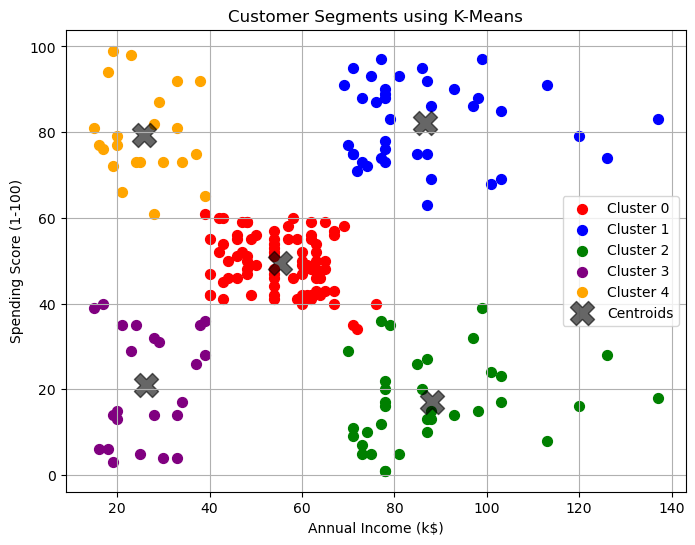

In [6]:
# plot the clusters 
plt.figure(figsize=(8,6))
colors=['red','blue','green','purple','orange']
for i in range(5):
    cluster=data[data['cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'],cluster['Spending Score (1-100)'],
                s=50,c=colors[i],label=f'Cluster {i}')
    
# plot cluster centers
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.6,marker='X',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments using K-Means')
plt.legend()
plt.grid(True)
plt.show()

## Pipelining

In [17]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Load the titanic dataset
titanic_data=sns.load_dataset('titanic')


In [6]:
titanic_data=titanic_data.dropna(subset=['embarked'])

In [9]:
x=titanic_data[['pclass','sex','age','fare','embarked']]
y=titanic_data['survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

numeric_features=['age','fare']
numerical_tranformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])
categorical_features=['pclass','sex','embarked']
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Combine preprocessing steps
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

In [11]:
# create the final pipeline
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(random_state=42))
])

In [12]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
y_pred=pipeline.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.80


In [19]:
# define hyperparameters to tune
param_grid={
    'classifier__n_estimators':[50,500,200],
    'classifier__max_depth':[5,10,20],
    'classifier__min_samples_split':[2,5,10]
}

In [ ]:
# use GridSearchCV for hyperparameter tuning
grid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

# fit the model
grid_search.fit(x_train,y_train)

# predict and evaluate
y_pred=grid_search.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

# output results
print('Best Parameters:',grid_search.best_params_)
print(f'Test Accuracy: {accuracy:.2f}')

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Test Accuracy: 0.81
